In [ ]:
Step 1: Load and Examine the Dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./Data/auto-mpg.csv")

In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,NaN,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,na,8.0,350.0,165,3693,11.5,70,1,buick skylark 320
2,18,8.0,318.0,150,3436,11.0,70,1,plymouth satellite
3,16,8.0,304.0,150,3433,12.0,70,1,amc rebel sst
4,17,8.0,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27,4.0,140.0,86,2790,15.6,82,1,ford mustang gl
394,44,4.0,97.0,52,2130,24.6,82,2,vw pickup
395,32,4.0,135.0,84,2295,11.6,82,1,dodge rampage
396,28,4.0,120.0,79,2625,18.6,82,1,ford ranger


In [9]:
dimension = data.shape
structure = data.dtypes
summary = data.describe()

In [10]:
dimension, structure, summary

((398, 9),
 mpg              object
 cylinders       float64
 displacement    float64
 horsepower       object
 weight            int64
 acceleration    float64
 model year        int64
 origin            int64
 car name         object
 dtype: object,
         cylinders  displacement       weight  acceleration  model year  \
 count  397.000000    398.000000   398.000000    398.000000  398.000000   
 mean     5.448363    193.425879  2970.424623     15.568090   76.010050   
 std      1.698329    104.269838   846.841774      2.757689    3.697627   
 min      3.000000     68.000000  1613.000000      8.000000   70.000000   
 25%      4.000000    104.250000  2223.750000     13.825000   73.000000   
 50%      4.000000    148.500000  2803.500000     15.500000   76.000000   
 75%      8.000000    262.000000  3608.000000     17.175000   79.000000   
 max      8.000000    455.000000  5140.000000     24.800000   82.000000   
 
            origin  
 count  398.000000  
 mean     1.572864  
 std    

In [ ]:
Step 2: Preprocess the Dataset

In [ ]:
data.replace('?',pd.NA,inplace=True)

In [13]:
data['mpg'] = pd.to_numeric(data['mpg'],errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')

In [41]:
missing_values = data.isna().sum()

In [21]:
data['mpg'].fillna(data['mpg'].mean(), inplace=True)
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)
data['cylinders'].fillna(data['cylinders'].mean(), inplace=True)

In [22]:
missing_values_after = data.isna().sum()

In [23]:
missing_values, missing_values_after

(mpg             1
 cylinders       1
 displacement    0
 horsepower      6
 weight          0
 acceleration    0
 model year      0
 origin          0
 car name        0
 dtype: int64,
 mpg             0
 cylinders       0
 displacement    0
 horsepower      0
 weight          0
 acceleration    0
 model year      0
 origin          0
 car name        0
 dtype: int64)

In [ ]:
Step 3: Plot Histograms for Continuous Variables

In [25]:
import matplotlib.pyplot as plt

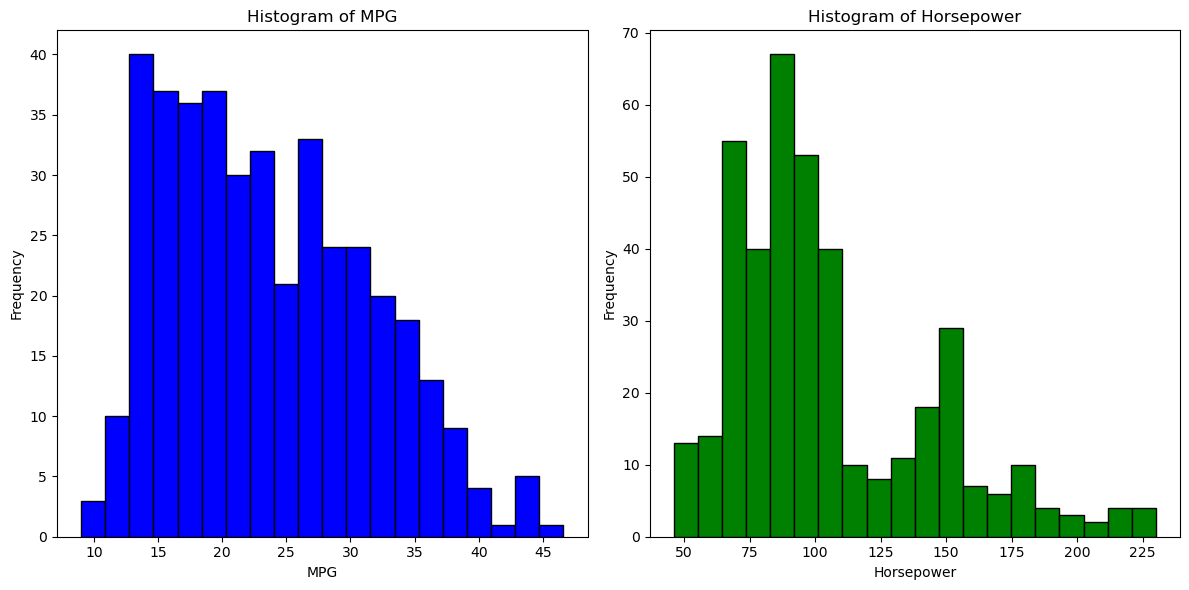

In [40]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(data['mpg'], bins=20, color='blue',edgecolor="black")
plt.title('Histogram of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['horsepower'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
Step 4: Violin Plot for a Numerical Variable

In [44]:
import seaborn as sns

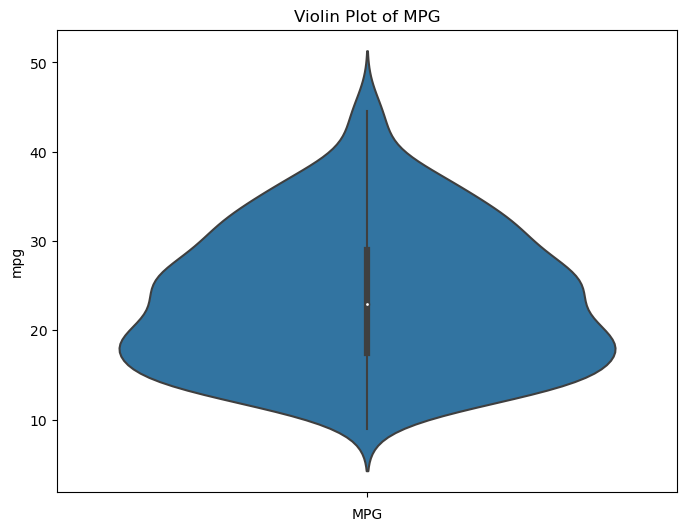

In [46]:
plt.figure(figsize=(8,6))
sns.violinplot(y=data['mpg'])
plt.title('Violin Plot of MPG')
plt.xlabel('MPG')
plt.show()

In [ ]:
Step 5: Recognize Outliers Using Box Plot

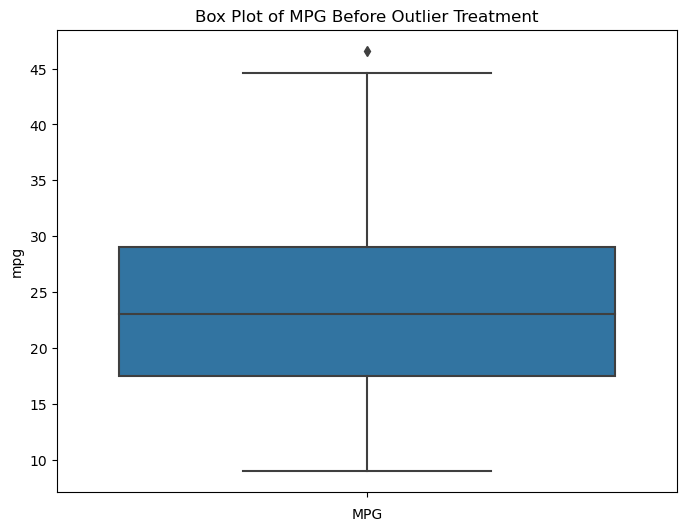

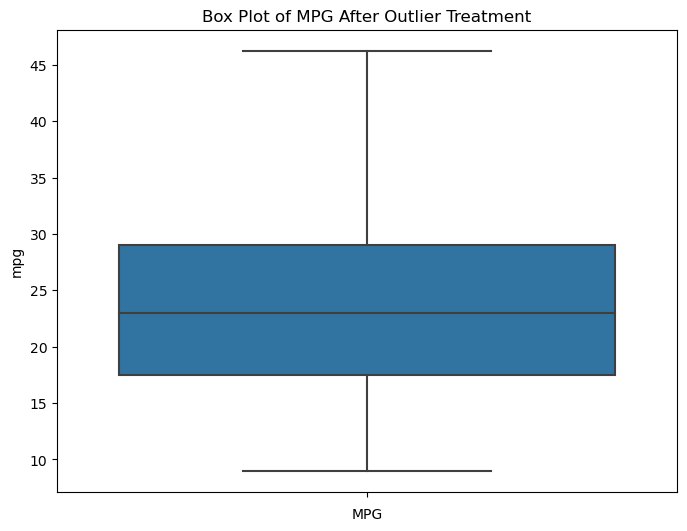

In [47]:
# Box plot before outlier treatment
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['mpg'])
plt.title('Box Plot of MPG Before Outlier Treatment')
plt.xlabel('MPG')
plt.show()

# Treat outliers by capping the data
Q1 = data['mpg'].quantile(0.25)
Q3 = data['mpg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['mpg'] = data['mpg'].clip(lower_bound, upper_bound)

# Box plot after outlier treatment
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['mpg'])
plt.title('Box Plot of MPG After Outlier Treatment')
plt.xlabel('MPG')
plt.show()


In [ ]:
Step 6: Display a Heat Map to Display the Relationship Among Attributes

C:\Users\Dhanush\AppData\Local\Temp\ipykernel_12980\3274348282.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


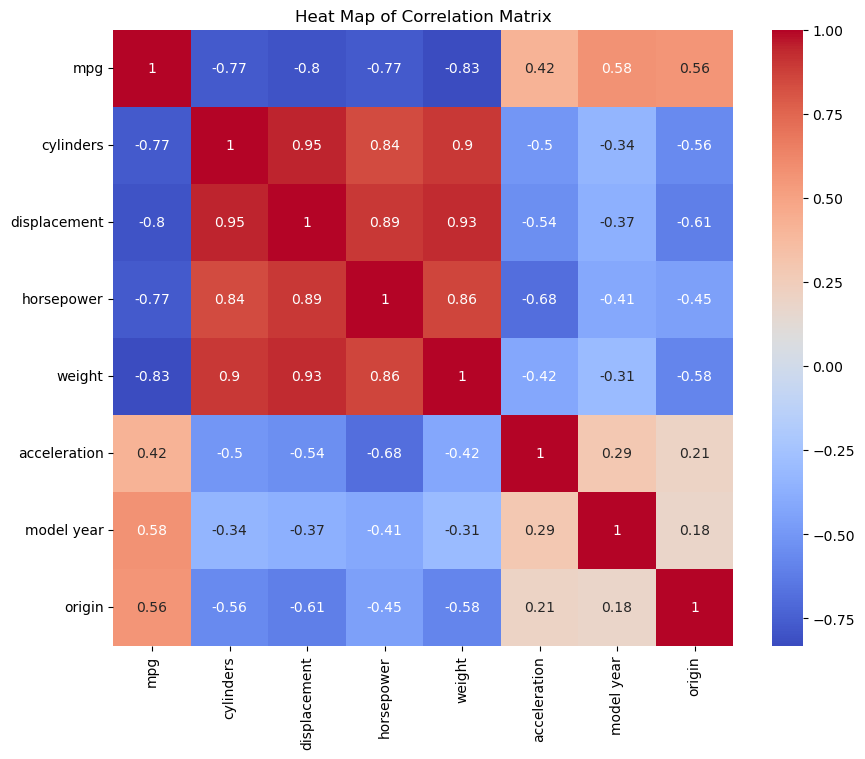

In [48]:
# Heat map
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map of Correlation Matrix')
plt.show()


In [ ]:
Step 7: Standardize the Continuous Variable

In [49]:
from sklearn.preprocessing import StandardScaler

# Standardize the continuous variables
scaler = StandardScaler()
data[['mpg', 'horsepower']] = scaler.fit_transform(data[['mpg', 'horsepower']])

# Display the first few rows of the standardized data
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,-0.710374,5.448363,307.0,0.669196,3504,12.0,70,1,chevrolet chevelle malibu
1,0.000113,8.000000,350.0,1.586599,3693,11.5,70,1,buick skylark 320
2,-0.710374,8.000000,318.0,1.193426,3436,11.0,70,1,plymouth satellite
3,-0.967052,8.000000,304.0,1.193426,3433,12.0,70,1,amc rebel sst
4,-0.838713,8.000000,302.0,0.931311,3449,10.5,70,1,ford torino
